In [5]:
import MetaTrader5 as mt5
import numpy as np
import joblib
import matplotlib.pyplot as plt
from datetime import datetime, timezone

print("MetaTrader5 package author: ",mt5.__author__)
print("MetaTrader5 package version: ",mt5.__version__)



MetaTrader5 package author:  MetaQuotes Ltd.
MetaTrader5 package version:  5.0.4424


In [6]:
if not mt5.initialize():
    print('Initialization failed, check internet connection. You must have Meta Trader 5 installed.')
    mt5.shutdown()

else:
    print(mt5.account_info()._asdict())
    print("\n")
    print(mt5.terminal_info()._asdict())
    print("\n")
    print(mt5.symbols_total())
    
    
# you code here

{'login': 5030916863, 'trade_mode': 0, 'leverage': 100, 'limit_orders': 200, 'margin_so_mode': 0, 'trade_allowed': True, 'trade_expert': True, 'margin_mode': 2, 'currency_digits': 2, 'fifo_close': False, 'balance': 1000.0, 'credit': 0.0, 'profit': 0.0, 'equity': 1000.0, 'margin': 0.0, 'margin_free': 1000.0, 'margin_level': 0.0, 'margin_so_call': 50.0, 'margin_so_so': 30.0, 'margin_initial': 0.0, 'margin_maintenance': 0.0, 'assets': 0.0, 'liabilities': 0.0, 'commission_blocked': 0.0, 'name': 'Mi Br', 'server': 'MetaQuotes-Demo', 'currency': 'USD', 'company': 'MetaQuotes Ltd.'}


{'community_account': False, 'community_connection': False, 'connected': True, 'dlls_allowed': False, 'trade_allowed': True, 'tradeapi_disabled': False, 'email_enabled': False, 'ftp_enabled': False, 'notifications_enabled': False, 'mqid': False, 'build': 4644, 'maxbars': 100000, 'codepage': 0, 'ping_last': 170369, 'community_balance': 0.0, 'retransmission': 0.07074121866857207, 'company': 'MetaQuotes Ltd.', 'nam

In [7]:
account = mt5.account_info()
terminal = mt5.terminal_info()

print(account.equity)

if(terminal.connected == True and terminal.trade_allowed == True):
    print("AI is successfully functional")
else:
    print("Please make sure metatrade 5 has internet and algo Trade is Turn On")
    mt5.shutdown()

1000.0
AI is successfully functional


In [8]:
result = mt5.buy("XAUUSD", 0.01)
print(result)

AttributeError: module 'MetaTrader5' has no attribute 'buy'

In [4]:
#rates = mt5.copy_rates_from_pos("GBPUSD", mt5.TIMEFRAME_H1, 0, 99999)  
target_market = ["GBPUSD","USDCAD","AUDUSD","USDCHF","NZDUSD","EURUSD","XAUUSD"]

In [5]:
n = 0

In [6]:
model = joblib.load(target_market[n]+" regressor.joblib")
sc_x = joblib.load(target_market[n]+" sc_x.joblib")
sc_y = joblib.load(target_market[n]+" sc_y.joblib")

In [9]:
#dtype=[('time', '<i8'), ('open', '<f8'), ('high', '<f8'), ('low', '<f8'), ('close', '<f8'), ('tick_volume', '<u8'), ('spread', '<i4'), ('real_volume', '<u8')])]
rates = mt5.copy_rates_from_pos(target_market[n], mt5.TIMEFRAME_H1, 0, 500)
print(rates[0][0])
print(rates.shape)
data = []
close_price = []
open_price = []

for i in range(len(rates)):
    data.append([rates[i][1],rates[i][5]])
    open_price.append(rates[i][1])
    close_price.append(rates[i][4])
data = np.array(data)
close_price = np.array(close_price)
print(data)
print(close_price[-1:])

1698948000
(500,)
[[1.21731e+00 7.41300e+03]
 [1.21790e+00 6.76100e+03]
 [1.22011e+00 4.48600e+03]
 [1.22046e+00 2.31700e+03]
 [1.22079e+00 2.08600e+03]
 [1.22025e+00 8.91000e+02]
 [1.22014e+00 1.44500e+03]
 [1.21964e+00 7.15000e+02]
 [1.21888e+00 3.16200e+03]
 [1.21887e+00 4.14100e+03]
 [1.21907e+00 3.90000e+03]
 [1.22019e+00 2.80600e+03]
 [1.21992e+00 2.38100e+03]
 [1.21999e+00 4.54600e+03]
 [1.22084e+00 5.44400e+03]
 [1.22056e+00 7.36500e+03]
 [1.21996e+00 7.66800e+03]
 [1.21936e+00 7.69400e+03]
 [1.22147e+00 6.70400e+03]
 [1.22220e+00 7.24600e+03]
 [1.22265e+00 2.13140e+04]
 [1.23127e+00 1.70980e+04]
 [1.23335e+00 1.59730e+04]
 [1.23422e+00 1.15320e+04]
 [1.23715e+00 1.23360e+04]
 [1.23823e+00 8.29000e+03]
 [1.23841e+00 4.29800e+03]
 [1.23806e+00 1.66100e+03]
 [1.23730e+00 8.47000e+02]
 [1.23661e+00 4.95000e+02]
 [1.23692e+00 1.29700e+03]
 [1.23714e+00 3.18300e+03]
 [1.23670e+00 4.67300e+03]
 [1.23686e+00 3.69700e+03]
 [1.23728e+00 2.52400e+03]
 [1.23748e+00 2.48900e+03]
 [1.23726e

In [10]:
data = sc_x.transform(data)
y_pred = model.predict(data)
print(y_pred)

[-1.66827918 -1.68111818 -1.63936339 -1.64374063 -1.65275416 -1.6411864
 -1.63936339 -1.64834063 -1.65093516 -1.65110358 -1.64958095 -1.6402371
 -1.6408116  -1.63986698 -1.65262487 -1.64750472 -1.6408116  -1.64705298
 -1.66189379 -1.66852486 -1.63650762 -1.59540176 -1.56728125 -1.56975569
 -1.58525696 -1.57311287 -1.57845763 -1.57149892 -1.59175223 -1.58310179
 -1.5854038  -1.58525696 -1.58345569 -1.58448226 -1.59141974 -1.57752573
 -1.59141974 -1.57129304 -1.57998177 -1.5718575  -1.5435597  -1.5666161
 -1.54942779 -1.55480333 -1.58068923 -1.57935241 -1.58068923 -1.58051964
 -1.58051964 -1.58525696 -1.58365137 -1.57574486 -1.57103012 -1.57270863
 -1.57270863 -1.57103012 -1.56524432 -1.56543616 -1.56568686 -1.56610064
 -1.59388615 -1.56610064 -1.59047361 -1.595662   -1.5936209  -1.58362093
 -1.57503272 -1.61271667 -1.59876396 -1.58355872 -1.57405933 -1.57892827
 -1.60798672 -1.60570461 -1.57405933 -1.60351114 -1.60830349 -1.58003663
 -1.57405933 -1.61166384 -1.60837022 -1.60934294 -1.61

In [11]:
y_pred = sc_y.inverse_transform(y_pred.reshape((len(y_pred),1)))
y_pred = y_pred.reshape(-1)
print(y_pred)


[1.21630127 1.2137424  1.2220643  1.2211919  1.21939547 1.22170097
 1.2220643  1.2202751  1.219758   1.21972443 1.2200279  1.22189017
 1.22177567 1.22196393 1.21942123 1.2204417  1.22177567 1.22053173
 1.2175739  1.2162523  1.22263347 1.23082603 1.23643057 1.2359374
 1.23284793 1.2352683  1.23420307 1.23558997 1.2315534  1.23327747
 1.23281867 1.23284793 1.23320693 1.23300233 1.23161967 1.2343888
 1.23161967 1.235631   1.2338993  1.2355185  1.24115837 1.23656313
 1.23998883 1.23891747 1.2337583  1.23402473 1.2337583  1.2337921
 1.2337921  1.23284793 1.23316793 1.23474373 1.2356834  1.23534887
 1.23534887 1.2356834  1.23683653 1.2367983  1.23674833 1.23666587
 1.2311281  1.23666587 1.23180823 1.23077417 1.23118097 1.233174
 1.23488567 1.2273751  1.23015593 1.2331864  1.23507967 1.23410927
 1.2283178  1.22877263 1.23507967 1.2292098  1.22825467 1.23388837
 1.23507967 1.22758493 1.22824137 1.2280475  1.22736777 1.22821127
 1.22819857 1.22828927 1.22807713 1.22807713 1.22768737 1.22426173


In [13]:

score = model.score(
    data[-50:],
    sc_y.transform(close_price[-50:].reshape((len(close_price[-50:]),1))).reshape(-1)
)
print(score)

0.3306917375298316


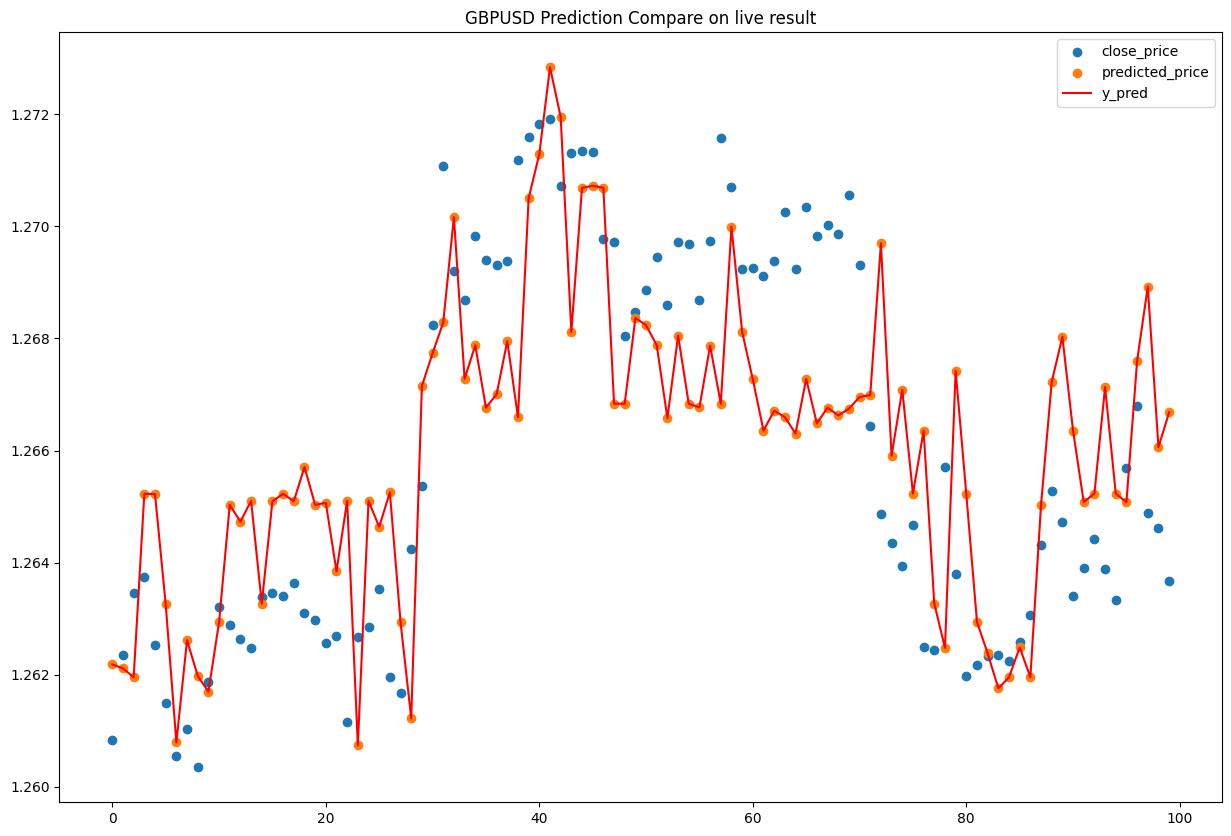

In [14]:
plt.figure(figsize=(15, 10))
plt.title(target_market[n]+" Prediction Compare on live result")
x_point = []
for i in range(len(close_price[-100:])):
  t = [i]
  x_point.append(t)
plt.scatter(x_point, close_price[-100:], label="close_price")
plt.scatter(x_point, y_pred[-100:], label="predicted_price")
#plt.plot(close_price[-100:], label="y_test")

y_pred = model.predict(data[-100:])
y_pred = sc_y.inverse_transform(y_pred.reshape((len(y_pred),1)))
y_pred = y_pred.reshape(-1)
plt.plot(
    y_pred,
    label="y_pred", color="red"
)



plt.legend()

plt.show()

In [19]:
data = sc_x.inverse_transform(data)


In [20]:
# creating an assumption on the system
print(close_price[-1:])
print(data[-1:,:])
y_pred = model.predict(sc_x.transform(data[-1:,:]))
y_pred = sc_y.inverse_transform(y_pred.reshape((len(y_pred),1)))
y_pred = y_pred.reshape(-1)
print(y_pred)



[1.2532]
[[1.7007588e+09 1.2532300e+00 5.3000000e+02]]


[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.3s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.4s


[1.25341337]


[Parallel(n_jobs=10)]: Done 300 out of 300 | elapsed:    0.6s finished


In [21]:
# set time zone to UTC
# Convert Unix epoch time to UTC time
utc_time = datetime.fromtimestamp(int(data[-1,0]))


# Extract the hour and minutes from the UTC datetime object
year = utc_time.year
month = utc_time.month
day = utc_time.day
hour = utc_time.hour
minutes = utc_time.minute

# Print the hour and minutes
# Print the results
print("Year:", year)
print("Month:", month)
print("Day:", day)
print("Hour:", hour)
print("Minutes:", minutes)

Year: 2023
Month: 11
Day: 23
Hour: 18
Minutes: 0


In [51]:
chart1H = mt5.copy_rates_from_pos(target_market[n], mt5.TIMEFRAME_H1, 0, 5)
print(chart1H[-1][0])

1698271200


In [52]:
utc_time1H = datetime.fromtimestamp(int(chart1H[-1][0]))
h = utc_time1H.hour
print(h)

for i in range(1,len(chart1H)):
    utc_time1H = datetime.fromtimestamp(int(chart1H[i * -1][0]))
    h = utc_time1H.hour
    if(hour == h):
        print(h, "The only time to trade")
        break
    print(h)

23
23
22
21 The only time to trade


In [22]:
#trade operation
if(terminal.connected == True and terminal.trade_allowed == True):
    print("AI is functional")
    total_order = mt5.positions_total()
    print(total_order)
    
    
else:
    print("Please make sure metatrade 5 has internet and algo Trade is Turn On")

AI is functional
4


In [10]:
# Get the current datetime in UTC
now_utc = datetime.utcnow()

# Convert the UTC datetime to GMT +0
now_gmt0 = now_utc.astimezone(timezone.utc)

# Get the year, month, day, and hour from the GMT +0 datetime
year = now_gmt0.year
month = now_gmt0.month
day = now_gmt0.day
hour = now_gmt0.hour + 1
mins = now_gmt0.minute
# Print the results
print("Year:", year)
print("Month:", month)
print("Day:", day)
print("Hour:", hour)
print("Minute:", mins)

Year: 2023
Month: 11
Day: 1
Hour: 7
Minute: 10


: 

In [45]:
lot = 0.01
symbol = "GBPUSD"
price = mt5.symbol_info_tick(symbol).bid
if(y_pred[-1] > price):
    price = mt5.symbol_info_tick(symbol).ask
    #buying a market
    request = {
        "action": mt5.TRADE_ACTION_DEAL,
        "symbol": symbol,
        "volume": lot,
        "type": mt5.ORDER_TYPE_BUY,
        "price": price,
        "sl": 0.0,
        "tp": 0.0,
        "deviation": 20,
        "magic": 0,
        "comment": "Dbot_ML",
        "type_time": mt5.ORDER_TIME_GTC,
        "type_filling": mt5.ORDER_FILLING_RETURN,
    }
elif(y_pred[-1] < price):
    price = mt5.symbol_info_tick(symbol).bid
    #buying a market
    request = {
        "action": mt5.TRADE_ACTION_DEAL,
        "symbol": symbol,
        "volume": lot,
        "type": mt5.ORDER_TYPE_SELL,
        "price": price,
        "sl": 0.0,
        "tp":0.0,
        "deviation": 20,
        "magic": 0,
        "comment": "Dbot_ML",
        "type_time": mt5.ORDER_TIME_GTC,
        "type_filling": mt5.ORDER_FILLING_RETURN,
    }
result=mt5.order_send(request)
print(result)

OrderSendResult(retcode=10018, deal=0, order=0, volume=0.0, price=0.0, bid=0.0, ask=0.0, comment='Market closed', request_id=2098276545, retcode_external=0, request=TradeRequest(action=1, magic=0, order=0, symbol='GBPUSD', volume=0.01, price=1.21471, stoplimit=0.0, sl=0.0, tp=0.0, deviation=20, type=0, type_filling=2, type_time=0, expiration=0, comment='Dbot_ML', position=0, position_by=0))


In [39]:
print(mt5.positions_total())

3


In [42]:
order_symbols = mt5.positions_get()
n = 1
for order_symbol in order_symbols:
    print(order_symbol.symbol)
    if(target_market[n] == order_symbol.symbol):
        print("seen")
        target_order = order_symbol
        break

print(target_order)
o_price = target_order.price_open
c_price = target_order.price_current
profit = target_order.profit
lot_size = target_order.volume
order_type = target_order.type
tp = target_order.tp
sl = target_order.sl

print("open price ", o_price)
print("close_price ",c_price)
print("profit ",profit)
print("lot size ",lot_size)
print("order type ",order_type)

USDCHF
USDCAD
seen
TradePosition(ticket=50764878607, time=1697054762, time_msc=1697054762903, time_update=1697054762, time_update_msc=1697054762903, type=1, magic=0, identifier=50764878607, reason=0, volume=0.01, price_open=1.36079, sl=0.0, tp=0.0, price_current=1.36136, swap=-0.01, profit=-0.42, symbol='USDCAD', comment='', external_id='')
open price  1.36079
close_price  1.36136
profit  -0.42
lot size  0.01
order type  1


In [27]:

#modify the market

request = {
    "action": mt5.TRADE_ACTION_SLTP,
    "symbol": target_order.symbol,
    "sl": 0.0,
    "tp": y_pred[-1],
    "position": target_order.ticket
}

result=mt5.order_send(request)
print(result)

OrderSendResult(retcode=10009, deal=0, order=0, volume=0.0, price=0.0, bid=0.0, ask=0.0, comment='Request executed', request_id=111532076, retcode_external=0, request=TradeRequest(action=6, magic=0, order=0, symbol='GBPUSD', volume=0.0, price=0.0, stoplimit=0.0, sl=0.0, tp=1.2213676333333343, deviation=0, type=0, type_filling=0, type_time=0, expiration=0, comment='', position=50758476285, position_by=0))


In [44]:
result = mt5.Close(target_order.symbol,ticket=target_order.ticket)
print(result)

False


In [22]:
print(mt5.last_error())
print(price)

(1, 'Success')
1.2278


: 

In [2]:
import time

for i in range(10):
    print("Hi ", i)
    time.sleep(5)

Hi  0
Hi  1
Hi  2
Hi  3
Hi  4
Hi  5
Hi  6
Hi  7
Hi  8
Hi  9
